# PHYS 20323/60323 Homework Week 8 (part 2)

FALL 2022


### 4) Altitude of a satellite (continued)

A satellite is to be launched into a circular orbit around the Earth so that it orbits the planet once every T seconds.

The altitude h above the Earth’s surface that the satellite must have is:

$$h = \left( \frac{G M T^2}{4\pi^2} \right)^{1/3} - R$$

where $G = 6.67 \times 10^{-11}$ m$^3$ kg$^{-1}$ s$^{-2}$
is Newton's gravitational constant, $M = 5.97 \times 10^{24}$ kg is the mass of the Earth, and $R = 6371$ km is its radius.

#### Write a program that asks the user to enter the desired value of T and then calculates and prints out the correct altitude in meters.


In [1]:
t = int(input("Enter T value (in minutes):"))
t_seconds = t * 60

import math

g = (6.67 * (10**-11))
m = 5.97 * 10**24
r = 6371 *1000

altitude = (((g * m * (t_seconds**2)) / (4 * (math.pi**2))) **(1/3)) - r
print (altitude, 'm')

Enter T value (in minutes):10
-4833974.84099663 m


#### Modify your code to calculate the times from 0.5 hour  to 30 days, in steps of 0.5 hours.   Then plot those data points (time vs h) with properly labled axes.  Plot orbits with height below 0 as red, and plots positive hieghts with times less than geosynchronous in blue and those longer in green.

Text(0.5, 1.0, 'Height vs. Time')

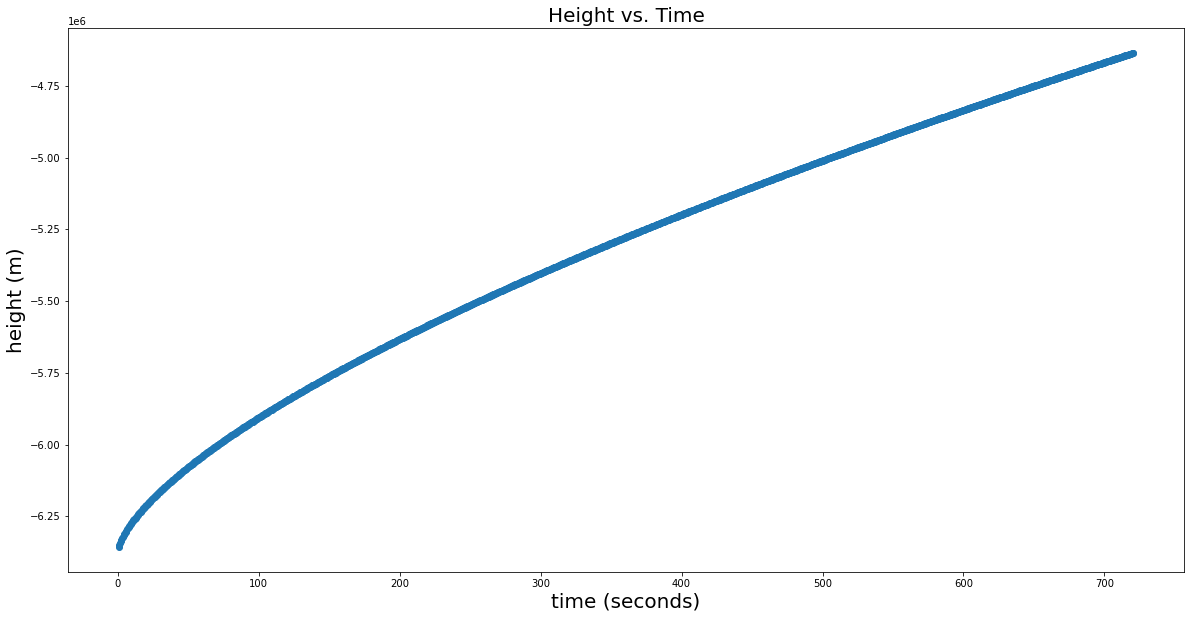

In [18]:
# Here I am just plotting the graph in one color to see what it should look like

from matplotlib import pyplot as plt
import numpy as np
g = (6.67 * (10**-11))
m = 5.97 * 10**24
r = 6371 *1000

#Creating two empty lists
x_list = []
y_list = []

for t in np.arange(0.5, 721, 0.5):
    t_seconds = t*3600
    x = x_list.append(t)
    altitude = (((g * m * (t**2)) / (4 * (math.pi**2))) **(1/3)) - r
    y = y_list.append(altitude)

# Putting the lists into arrays so that they can be plotted
x_array = np.array(x_list)
y_array = np.array(y_list)

# Now I am plotting the figure with the x and y arrays, 
# where the x array is time and the y array is height
fig1 = plt.figure(figsize=(20,10))
ax1 = fig1.add_subplot(111)
ax1.scatter(x_array,y_array)

ax1.set_xlabel("time (seconds)",size=20)   # naming the axes
ax1.set_ylabel("height (m)",size=20) 
plt.title("Height vs. Time", size=20)

Text(0.5, 1.0, 'Height vs. Time')

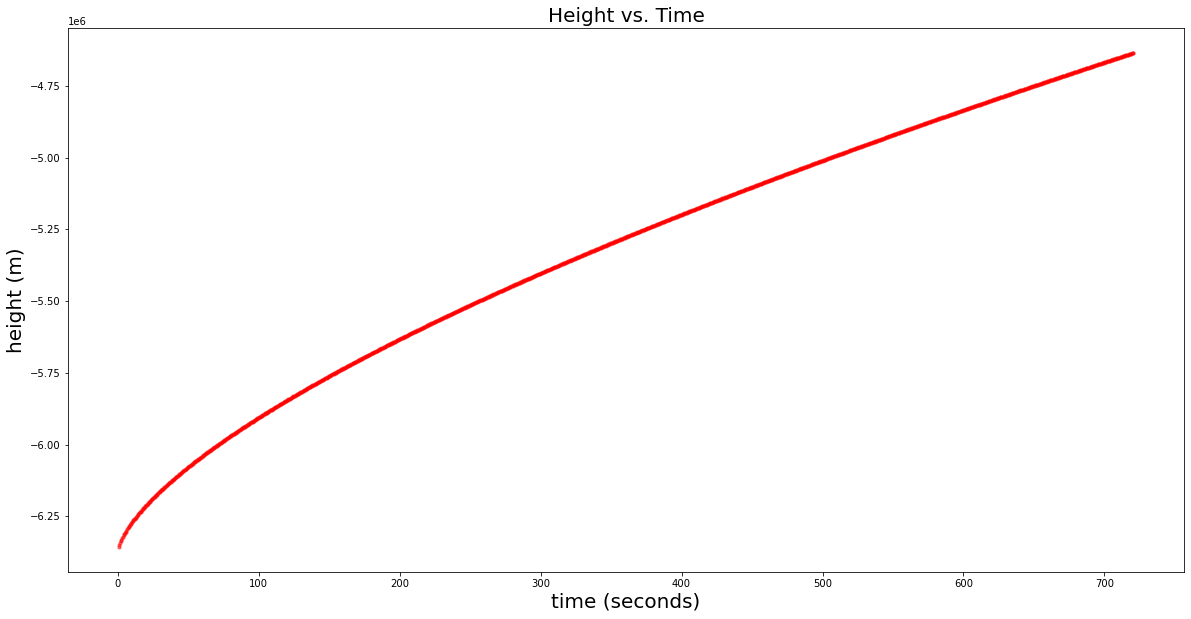

In [17]:
from matplotlib import pyplot as plt
import numpy as np
import math

g = (6.67 * (10**-11))
m = 5.97 * 10**24
r = 6371 *1000

x_list = []
y_list = []

for t in np.arange(0.5, 721, 0.5):
    t_seconds = t*3600
    x = x_list.append(t)
    altitude = (((g * m * (t**2)) / (4 * (math.pi**2))) **(1/3)) - r
    y = y_list.append(altitude)
    
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)

x_array = np.array(x_list)
y_array = np.array(y_list)

# Here, I am extracting the values with heights less than zero  
# so that I can plot those as red
red_pointsx = x_array[y_array<0]
red_pointsy = y_array[y_array<0]
#ax1.scatter(red_pointsx, red_pointsy, s= 10, c='r', alpha = .5)

# Then, I am doing the same thing for the lines that should be blue and green
blue_pointsx = x_array[(y_array>0) & (x_array<86148)]
blue_pointsy = y_array[(y_array>0) & (x_array<86148)]
#ax1.scatter(blue_pointsx, blue_pointsy, s= 10, c='b', alpha = .5)

green_pointsx = x_array[(y_array>0) & (x_array>=86148)]
green_pointsy = y_array[(y_array>0) & (x_array>=86148)]
#ax1.scatter(green_pointsx, green_pointsy, s= 10, c='g', alpha = .5)


# For some reason, I am only getting a red line.
# Based on the graph, this makes sense because the axes are not showing where the 
# other two lines would be.
# However, when I tried changing the axis limits, then the whole line disappeared. 
image = ax.scatter(red_pointsx, red_pointsy, s= 10, c='r', alpha = .5)
image = ax.scatter(blue_pointsx, blue_pointsy, s= 10, c='b', alpha = .5)
image = ax.scatter(green_pointsx, green_pointsy, s= 10, c='g', alpha = .5)

ax.set_xlabel("time (seconds)", size=20)   # naming the axes
ax.set_ylabel("height (m)", size=20)  
plt.title("Height vs. Time", size=20)

### 2) Planetary orbits

The orbit in space of one body around another, such as a planet around the Sun, need not be circular. In general it takes the form of an ellipse, with the body sometimes closer in and sometimes further out. If you are given the distance $l_1$ of closest approach that a planet makes to the Sun, also called its perihelion, and its linear velocity $v_1$ at *perihelion*, then any other property of the orbit can be calculated from these two as follows.

Kepler’s second law tells us that the distance $l_2$ and velocity $v_2$ of the planet at its most distant point, or *aphelion*, satisfy $l_2 v_2 = l_1 v_1$. 

Solve for $v_2$ using, where $M = 1.9891 \times 10^{30}$ kg is the mass of the Sun, and G = $6.6738 \times 10^{−11}$ m$^3$ kg$^{−1}$ s$^{−2}$ :

$$ v_2^2 - \frac{2 G M}{ v_1 l_1}  v_2 - \left( v_1^2 - \frac{2 G M}{ l_1} \right) = 0 $$


Given the values of $v_1$, $l_1$, and $l_2$, other parameters of the orbit are given by simple formulas can that be derived from Kepler’s laws and the fact that the orbit is an ellipse:

Semi-Major Axis $$ a = \frac{1}{2} (l_1 + l_2) $$ 
Semi-Minor Axis: $$ b = \sqrt{l_1  l_2} $$ 
Orbital Period: $$ T = \frac{2 \pi a b}{l_1 v_1} $$ 
Orbital eccentricity:  $$ e = \frac{l_2 - l_1}{l_2 + l_1}$$

#### Write a program with functions that asks the user to enter the distance to the Sun and velocity at perihelion, then calculates and prints the quantities $l2$, $v2$, $a$, $b$, $T$, and $e$.



#### Test your program by having it calculate the properties of the orbits of the Earth (for which $l_1 = 1.4710 \times 10^{11}$ m and $v_1 = 3.0287 \times 10^4$ m s$^{−1}$ ) and Halley’s comet ($l_1 = 8.7830 \times 10^{10}$ m and $v_1 = 5.4529 \times 10^4$ m s${−1}$ ). Among other things, you should find that the orbital period of the Earth is one year and that of Halley’s comet is about 76 years.